In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils import *
from visualize import *

data = pd.read_csv('data_e.csv', header=0).set_index('frame')[10000:30000]
data

,snout_x,snout_y,l_ear_x,l_ear_y,r_ear_x,r_ear_y,spine1_x,spine1_y,spine2_x,spine2_y,...,v_orientation,dv_v_snout,dv_v_spine1,dv_v_spine2,dv_v_tail1,dv_v_snout_food_port,dv_v_snout_l_screen,dv_v_snout_m_screen,dv_v_snout_r_screen,dv_v_orientation
frame,,,,,,,,,,,,,,,,,,,,,
10000,13.184988,0.862887,14.472658,3.241670,13.013559,3.693968,14.308279,4.989830,14.257065,6.985753,...,0.005012,-0.000193,0.017983,0.001225,0.008768,0.000898,-0.001580,-0.001648,-0.001424,0.009338
10001,13.185086,0.865009,14.472292,3.233712,13.014426,3.712802,14.330456,4.988810,14.259187,6.985656,...,-0.006973,-0.000055,0.013328,0.001507,0.006238,-0.000324,0.000769,0.000850,0.000779,-0.011985
10002,13.184727,0.866461,14.453960,3.218924,13.016545,3.724189,14.331386,5.009024,14.260816,6.987548,...,-0.001517,0.000369,-0.030047,-0.000698,-0.030512,0.000097,0.000444,0.000688,0.000803,0.005456
10003,13.186267,0.868730,14.470461,3.193920,13.016843,3.730661,14.346082,5.008347,14.260987,6.991262,...,0.000233,0.001671,0.019468,-0.002062,-0.009916,-0.001235,-0.000026,-0.000892,-0.001571,0.001750
10004,13.566566,0.851227,14.459017,3.189024,13.014402,3.730774,14.345814,5.002511,14.260987,6.991262,...,0.092125,0.535646,-0.020404,-0.000242,-0.000014,0.109925,0.166555,0.008422,-0.146509,0.091892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,13.470416,0.980117,14.359175,3.406342,12.645492,3.524396,13.694455,5.087890,13.396836,7.023164,...,-0.003228,-0.148719,-0.019199,0.000150,0.017407,0.024980,0.158569,0.124820,0.069763,0.023877
29996,13.470416,0.980117,14.381812,3.417635,12.631315,3.530578,13.694455,5.087890,13.396870,7.023907,...,0.000000,0.000000,-0.001813,-0.000492,-0.017649,0.000000,0.000000,0.000000,0.000000,0.003228
29997,13.186094,0.993203,14.381246,3.405326,12.631584,3.536414,13.694274,5.083964,13.400902,7.023722,...,-0.079988,0.402092,0.000256,0.005654,0.033600,-0.005521,-0.123467,-0.003751,0.112851,-0.079988


In [2]:
from decorator import decorator

@decorator
def plot_handler(func, *args, **kwargs):
    
    # initialize graph
    fig, ax = plt.subplots()
    ax.set_xlim(0, TRAY_LENGTH)
    ax.set_ylim(-2, 22)
    
    # plot reference points
    #   find coordinates
    df = args[0]
    fd, _, _, ls, ms, rs = [(df[pt+'_x'].iloc[0], df[pt+'_y'].iloc[0]) for pt in REFE]
    
    #   draw circles
    for pt, clr in zip((fd, ls, ms, rs), ('greenyellow', 'tab:orange', 'orangered', 'tab:red')):
        ax.add_patch(plt.Circle(pt, radius=0.8, color=clr, fill=False))
    
    # pass to function
    func(*args, **kwargs)
    plt.show()

In [10]:
@plot_handler
def heatmap(df : pd.DataFrame, col : str, filt_idx=None):
    """Position heatmap using 2d KDE plot"""
    
    # locate data then apply filter (or not)
    if type(filt_idx)!=type(None):
        X = df[col+'_x'].loc[filt_idx]
        Y = df[col+'_y'].loc[filt_idx]
    else:
        X = df[col+'_x']
        Y = df[col+'_y']
    
    # plot
    sns.kdeplot(data=df, x=X, y=Y, fill=True, bw_adjust=2e-1, cut=3, levels=100, cmap='YlOrBr');

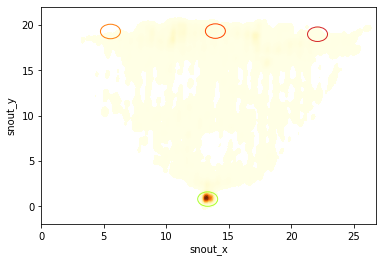

In [11]:
heatmap(data, 'snout')

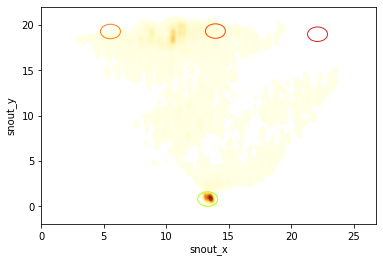

In [12]:
heatmap(data, 'snout', data['forward']==0)

In [6]:
@plot_handler
def traj(df : pd.DataFrame, col : str, start : int, end : int):
    """Plot trajectory of [col] between [start] and [end] (in seconds)"""
    
    x = df[col+'_x'].iloc[range(start, end)]
    y = df[col+'_y'].iloc[range(start, end)]
    
    sns.lineplot(x=x, y=y, sort=False, lw=1, ci=None)

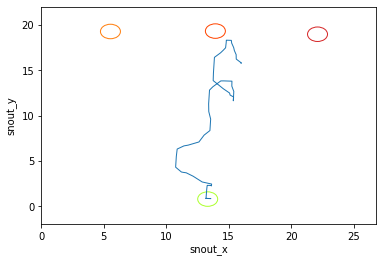

In [7]:
traj(data, 'snout', 0, 100)  # tracjectory of snout in 4 seconds (of the clipped video)